In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [16]:
import torchxrayvision as xrv
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.utils import to_categorical

In [17]:
new_img_height = 128
new_img_width = 128
channels = 3

# **MobileNET**

In [18]:
CLASS_NAMES= ['No Finding', 'COVID-19']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_x = np.load('train_x.npy')
train_label = np.load('train_label.npy')
test_x = np.load('test_x.npy')
test_label = np.load('test_label.npy')
validation_x = np.load('validation_x.npy')
validation_label = np.load('validation_label.npy')

In [21]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
train_label.dtype

dtype('float16')

In [23]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image

from IPython.display import SVG
import scipy.misc

In [24]:
import efficientnet.tfkeras as efc

In [25]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.applications import EfficientNetB6
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications import *

In [26]:
import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [27]:
model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(128,128,3),
    pooling=None,
    classes=2,
    classifier_activation="softmax",
#    **kwargs
)

In [29]:
from tensorflow.keras import models
from tensorflow.keras import layers

new_model = models.Sequential()
new_model.add(model)
#2rd conv layer
new_model.add(tf.keras.layers.Conv2D(32, 3, padding="same"))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.MaxPooling2D(2, padding="same"))
#3th conv layer
new_model.add(tf.keras.layers.Conv2D(64, 3, padding="same"))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.MaxPooling2D(2, padding="same"))
#Flatten Layer
new_model.add(tf.keras.layers.Flatten())

new_model.add(tf.keras.layers.Dense(128, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.Dropout(0.2))
#output Dense Layer
new_model.add(tf.keras.layers.Dense(2))
new_model.add(tf.keras.layers.Activation('softmax'))
adam = tf.keras.optimizers.Adam(lr=0.001)


In [30]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
conv2d_190 (Conv2D)          (None, 2, 2, 32)          589856    
_________________________________________________________________
batch_normalization_190 (Bat (None, 2, 2, 32)          128       
_________________________________________________________________
activation_190 (Activation)  (None, 2, 2, 32)          0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_191 (Conv2D)          (None, 1, 1, 64)          18496     
_________________________________________________________________
batch_normalization_191 (Bat (None, 1, 1, 64)         

In [31]:
epochs = 50
num_classes = 2

#compila e treina o modelo com os dados carregados
new_model.compile(loss='sparse_categorical_crossentropy', metrics=['acc'], optimizer=adam)
model_trained = new_model.fit(train_x, train_label,epochs=epochs,verbose=1,validation_data=(validation_x, validation_label),shuffle=False)

Epoch 1/50
50/50 [==============================] - 16s 323ms/step - loss: 1.3451 - acc: 0.6862 - val_loss: 67.0453 - val_acc: 0.4861
Epoch 2/50
50/50 [==============================] - 11s 223ms/step - loss: 0.8797 - acc: 0.8727 - val_loss: 1.1571 - val_acc: 0.5164
Epoch 3/50
50/50 [==============================] - 11s 224ms/step - loss: 0.5983 - acc: 0.9231 - val_loss: 1.1595 - val_acc: 0.4861
Epoch 4/50
50/50 [==============================] - 11s 224ms/step - loss: 0.4128 - acc: 0.9609 - val_loss: 1.1161 - val_acc: 0.4861
Epoch 5/50
50/50 [==============================] - 11s 224ms/step - loss: 0.3075 - acc: 0.9735 - val_loss: 1.2317 - val_acc: 0.4861
Epoch 6/50
50/50 [==============================] - 11s 224ms/step - loss: 0.2094 - acc: 0.9880 - val_loss: 1.1786 - val_acc: 0.4861
Epoch 7/50
50/50 [==============================] - 11s 225ms/step - loss: 0.3290 - acc: 0.9275 - val_loss: 0.8927 - val_acc: 0.4861
Epoch 8/50
50/50 [==============================] - 11s 225ms/step -

In [32]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_96 (Conv2D)              (None, 63, 63, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_96 (BatchNo (None, 63, 63, 32)   96          conv2d_96[0][0]                  
__________________________________________________________________________________________________
activation_96 (Activation)      (None, 63, 63, 32)   0           batch_normalization_96[0][0]     
_______________________________________________________________________________________

**Random Forest**

In [33]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [34]:
test_x = np.load('test_x.npy')
test_label = np.load('test_label.npy')

In [36]:
new_model2 = keras.Model(inputs=new_model.input, outputs=new_model.get_layer('flatten').output)
featureVector = new_model2.predict(train_x)

In [37]:
featureVector2 = new_model2.predict(test_x)


In [38]:
print(featureVector.shape)

(1587, 64)


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(featureVector,train_label)



RandomForestClassifier()

In [41]:
test_x.shape

(497, 128, 128, 3)

In [42]:
y_pred=clf.predict(featureVector2)

In [43]:
featureVector.shape

(1587, 64)

In [44]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_label, y_pred))

Accuracy: 0.9879275653923542


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
clf = DecisionTreeClassifier(random_state=0)

# **Testes**

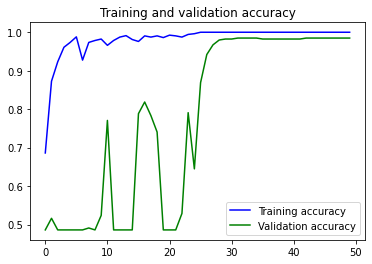

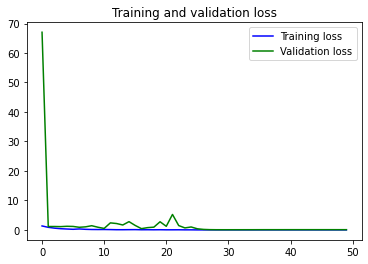

In [47]:
import matplotlib.pyplot as plt

accuracy = model_trained.history['acc']
val_accuracy = model_trained.history['val_acc']
loss = model_trained.history['loss']
val_loss = model_trained.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [48]:
#avalia a fase de teste

model_loss, model_accuracy = new_model.evaluate(test_x, test_label, verbose=1)

#mostra o resultado
print('Test loss:', model_loss)
print('Test accuracy:', model_accuracy)

16/16 [==============================] - 1s 62ms/step - loss: 0.0714 - acc: 0.9879
Test loss: 0.07137329876422882
Test accuracy: 0.9879275560379028


In [49]:
#faz a predição das imagens

from tensorflow.keras.utils import to_categorical

pred = new_model.predict(test_x, verbose=0)

pred_probs = np.argmax(pred,axis=1)

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [51]:
cm = confusion_matrix(test_label, pred_probs)

In [52]:
#gera os valores de falso positivo, falso negativo, verdadeiro positivo e verdadeiro negativo
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

f1score = f1_score(test_label, pred_probs, average='weighted')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy    = (tp + tn) / (tp + tn + fp + fn)
precision   = tp / (tp + fp)


print("F1 Score:", f1score)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:  ", precision)
print("Accuracy:   ", accuracy)

F1 Score: 0.9879258053341757
Sensitivity: [0.99601594 0.9796748 ]
Specificity: [0.9796748  0.99601594]
Precision:   [0.98039216 0.99586777]
Accuracy:    [0.98792757 0.98792757]
